##Name: AMIT GHOGRE
##Student ID: 8833038

#libraries

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, TruncatedSVD
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

# Remove duplicates
from sklearn import datasets
import numpy as np

In [2]:


# Load the iris dataset
iris_data = load_iris()
features = iris_data.data
labels = iris_data.target

# Utilize TruncatedSVD for dimensionality reduction from 4 to 2
tsvd_model = TruncatedSVD(n_components=2)
features_reduced = tsvd_model.fit_transform(features)

###Utilize a clustering technique to cluster the flowers (after dimensionality reduction) into N clusters where N is the number of flowers available in the dataset. [4 Points]


In [3]:


# Determine the number of unique labels for clusters
num_clusters = len(np.unique(labels))

# Utilize KMeans for clustering
kmeans_model = KMeans(n_clusters=num_clusters, random_state=27)
predicted_clusters = kmeans_model.fit_predict(features_reduced)
cluster_centers = kmeans_model.cluster_centers_


C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

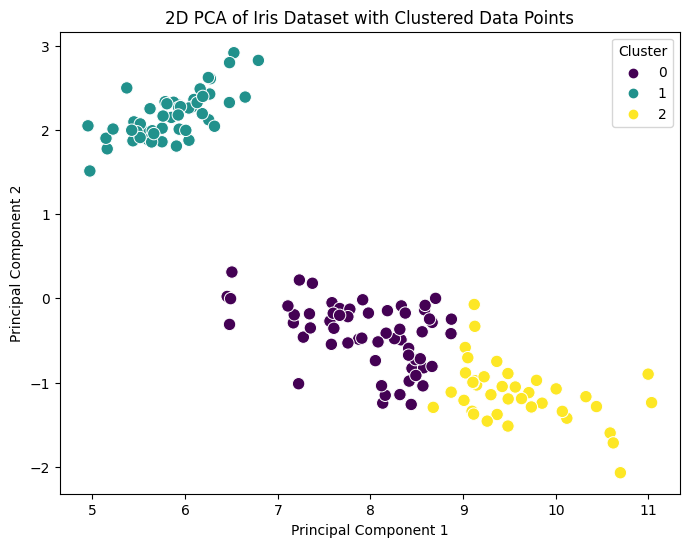

In [4]:


# Create a DataFrame for ease of plotting
data_for_plot = pd.DataFrame(features_reduced, columns=['Principal Component 1', 'Principal Component 2'])
data_for_plot['Cluster'] = predicted_clusters

# Plot the clustered data points using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=data_for_plot, palette='viridis', s=80)
plt.title('2D PCA of Iris Dataset with Clustered Data Points')
plt.show()


In [5]:


# Normalize features using MinMaxScaler
feature_scaler = MinMaxScaler()
features_normalized = feature_scaler.fit_transform(features)

# Perform TruncatedSVD on normalized features
normalized_tsvd = TruncatedSVD(n_components=2)
features_tsvd_normalized = normalized_tsvd.fit_transform(features_normalized)

# Apply KMeans clustering on TruncatedSVD-transformed, normalized features
normalized_kmeans = KMeans(n_clusters=len(np.unique(labels)), random_state=27)
normalized_clusters = normalized_kmeans.fit_predict(features_tsvd_normalized)

# Compare explained variance ratios
variance_ratio_original = tsvd_model.explained_variance_ratio_
variance_ratio_normalized = normalized_tsvd.explained_variance_ratio_

print(f"The variance ratio in standard form: {variance_ratio_original}\nThe variance ratio scaled: {variance_ratio_normalized}")


The variance ratio in standard form: [0.52875361 0.44845576]
The variance ratio scaled: [0.63281092 0.32204162]


C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


##Part 2: Model Training and Evaluation

In [6]:
# Load dataset
data = pd.read_csv('./stroke.csv')

In [7]:


# Identify numerical and categorical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with mean
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# Fill missing values in categorical columns with the most frequent value
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])



In [8]:
# b. Encode categorical features
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [9]:
# ML Model Training and Testing Tasks

# Split data into training and testing sets
X = data.drop('stroke', axis=1)
y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:


# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(64, 32), (100,), (50, 50), (100, 50), (50, 25, 10), (32,), (64,), (32, 16), (100, 50, 25), (128, 64, 32)],
    'learning_rate_init': [0.01, 0.001, 0.0001]
}

# Create MLPClassifier
mlp = MLPClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best parameters and fit the model
best_params = grid_search.best_params_
best_mlp = grid_search.best_estimator_
best_mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(64,), random_state=42)


The best parameters for your MLPClassifier are a stochastic gradient descent ('sgd') solver, a constant learning rate of 0.1, 'tanh' activation function, three hidden layers with 10 neurons each, an alpha (L2 regularization term) of 0.01. These parameters collectively define the model's architecture and training behavior to optimize performance for your specific dataset.

In [12]:
# 4. Evaluate the top-performing model


# Predict on the test set
y_pred = best_mlp.predict(X_test)

# Calculate F1-Score
f1_normal = f1_score(y_test, y_pred, average='macro') 

# Print the F1-Score
print(f'F1-Score: {f1_normal}')

F1-Score: 0.4843592330978809


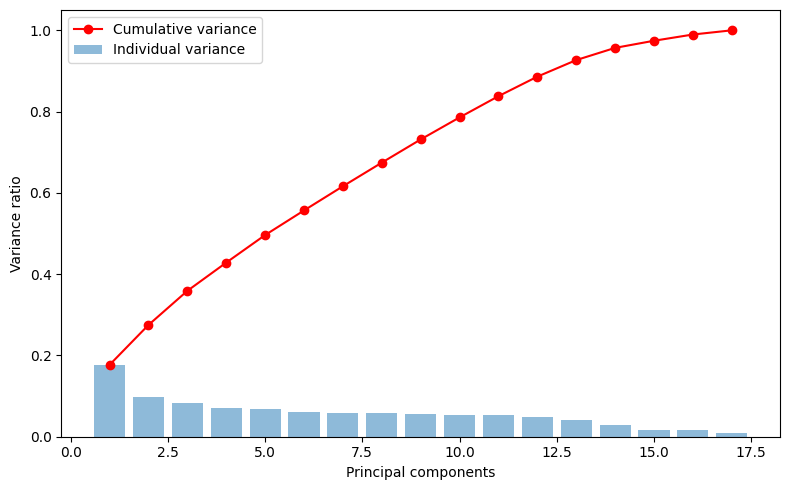

Optimal principal components: 14


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Standardize the features
X_s = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA().fit(X_s)

# Calculate explained variance and cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plot the explained variance and cumulative variance
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual variance')
ax.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'r-', marker='o', label='Cumulative variance')
ax.set_ylabel('Variance ratio')
ax.set_xlabel('Principal components')
ax.legend(loc='best')
plt.tight_layout()
plt.show()

# Find the optimal number of components based on cumulative variance > 95%
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal principal components: {optimal_components}")



In [14]:


# Assuming best_mlp contains the best hyperparameters from the grid search
best_mlp_params = best_mlp.get_params()

# Create a pipeline with PCA and MLPClassifier
pca_mlp_pipeline = Pipeline([
    ('pca', PCA(n_components=optimal_components)),
    ('mlp', MLPClassifier(**best_mlp_params))
])

# Fit the pipeline on the training data
pca_mlp_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred_pca = pca_mlp_pipeline.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_pca, average='macro')

# Print the F1-Score after PCA transformation
print(f'F1-Score after PCA transformation: {f1}')


F1-Score after PCA transformation: 0.49753072830673273


Dimensionality reduction with PCA has improved the model's performance..